# Funathon 2023 - Sujet 5

Analyse textuelle des commentaires clients de services de commande de repas en ligne

In [1]:
"""
# download the data
import pandas as pd

df = pd.read_parquet("https://minio.lab.sspcloud.fr/projet-funathon/2023/sujet5/diffusion/reviews_takeaway.parquet")

# local copy of the data
df.to_parquet("reviews_takeaway.parquet")
"""

# Data

Load data

In [1]:
# import libraries


import pandas as pd

import matplotlib.pyplot as plt

import random

import textwrap

In [2]:
df = pd.read_parquet("reviews_takeaway.parquet")

In [3]:
df.head()

,note,date,title,comment,company
0,3,2023-05-16 14:07:58,Des produits manquants pour une…,"Des produits manquants pour une recette, conta...",hellofresh.fr
1,5,2023-05-16 13:08:14,Facile et pratique,Les box hellofresh nous facilitent le quotidie...,hellofresh.fr
2,4,2023-05-14 20:08:49,Super idée recettes délicieuses.,Super idée recettes délicieuses. Tous les ingr...,hellofresh.fr
3,1,2023-05-16 19:33:36,Service de livraison incompétent !,"Jusqu’à présent satisfait de la marque, mais u...",hellofresh.fr
4,1,2023-05-15 17:02:04,Expérience d'achat inacceptable,Expérience d'achat inacceptable. Une chaîne du...,hellofresh.fr


In [4]:
# DataFrame info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20438 entries, 0 to 20437
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   note     20438 non-null  int64         
 1   date     20438 non-null  datetime64[ns]
 2   title    20438 non-null  object        
 3   comment  20438 non-null  object        
 4   company  20438 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 798.5+ KB
None


In [5]:
# Commentaires par note

# Definir le nombre de samples par note
samples_per_note = 1


grouped_df = df.groupby('note')
selected_indexes = []

for note, group in grouped_df:
    indexes = random.sample(group.index.tolist(), k=samples_per_note)
    selected_indexes.extend(indexes)


for index in selected_indexes:
    note = df.loc[index, 'note']
    title = df.loc[index, 'title']
    comment = df.loc[index, 'comment']
    
    print("Note", note, "comments:")
    print("Title:", title)
    
    wrapped_comment = textwrap.fill(comment, width=80)
    print("Comment:")
    print(wrapped_comment)
    
    print()



Note 1 comments:
Title: Bonjour Insatisfaite
Comment:
BonjourTrès satisfaite de vos services, mais aujourd'hui insatisfaite du
livreur. Agée, j'ai des difficultés pour me déplacer, réside dans une résidence
au 3eme étage, le livreur n'a pas voulu monter ma livraison. Si cela se
reproduit je me verrai dans l'obligation de ne plus commander Cordialement

Note 2 comments:
Title: Suite à un problème technique je n'ai pas reçu les menus complets
Comment:
Suite à un problème technique je n'ai pas eu la viande de boeuf ni le poulet.
donc 2 menus sur 3 que je ne peux pas réaliser. J'aurai aimé être prévenue avant
afin de décaler mon colis ou choisir d'autres menus. Vous me promettez un crédit
sur une prochiane box sans réduction. Or à ce jour je n'ai encore rien reçu je
ne connais pas le et je commande toujours lorsqu'il y a une réduction, sinon
c'est hors budget pour moi.

Note 3 comments:
Title: Des problemes concernant la livraison
Comment:
Bonjour. J' apprécie la demarche d'Aurore market m

Datetime

In [6]:
# day, day_name, month, year

df['hour'] = df['date'].dt.hour
df['day'] = df['date'].dt.day
df['day_name'] = df['date'].dt.day_name()
df['month'] = df['date'].dt.month
df['month_name'] = df['date'].dt.month_name()

# Define a function to map month values to seasons
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Autumn'
    else:
        return 'Winter'

df['season'] = df['month'].apply(get_season)

df['year'] = df['date'].dt.year

# Add new features for the length of 'title' and 'comment'
df['title_len'] = df['title'].apply(len)
df['comment_len'] = df['comment'].apply(len)


In [7]:
df.head()

,note,date,title,comment,company,hour,day,day_name,month,month_name,season,year,title_len,comment_len
0,3,2023-05-16 14:07:58,Des produits manquants pour une…,"Des produits manquants pour une recette, conta...",hellofresh.fr,14,16,Tuesday,5,May,Spring,2023,32,383
1,5,2023-05-16 13:08:14,Facile et pratique,Les box hellofresh nous facilitent le quotidie...,hellofresh.fr,13,16,Tuesday,5,May,Spring,2023,18,307
2,4,2023-05-14 20:08:49,Super idée recettes délicieuses.,Super idée recettes délicieuses. Tous les ingr...,hellofresh.fr,20,14,Sunday,5,May,Spring,2023,32,402
3,1,2023-05-16 19:33:36,Service de livraison incompétent !,"Jusqu’à présent satisfait de la marque, mais u...",hellofresh.fr,19,16,Tuesday,5,May,Spring,2023,34,263
4,1,2023-05-15 17:02:04,Expérience d'achat inacceptable,Expérience d'achat inacceptable. Une chaîne du...,hellofresh.fr,17,15,Monday,5,May,Spring,2023,31,459


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20438 entries, 0 to 20437
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   note         20438 non-null  int64         
 1   date         20438 non-null  datetime64[ns]
 2   title        20438 non-null  object        
 3   comment      20438 non-null  object        
 4   company      20438 non-null  object        
 5   hour         20438 non-null  int64         
 6   day          20438 non-null  int64         
 7   day_name     20438 non-null  object        
 8   month        20438 non-null  int64         
 9   month_name   20438 non-null  object        
 10  season       20438 non-null  object        
 11  year         20438 non-null  int64         
 12  title_len    20438 non-null  int64         
 13  comment_len  20438 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(6)
memory usage: 2.2+ MB
None


In [9]:
df.columns

Index(['note', 'date', 'title', 'comment', 'company', 'hour', 'day',
       'day_name', 'month', 'month_name', 'season', 'year', 'title_len',
       'comment_len'],
      dtype='object')

# exploratory data analysis

Companies

In [10]:
# Count distinct noms de company
distinct_company_count = df['company'].nunique()
print("Count of distinct company names:", distinct_company_count)

Count of distinct company names: 7


In [11]:
# List distinct noms de company
distinct_company_list = df['company'].unique().tolist()
print("List of distinct company names:", distinct_company_list)

List of distinct company names: ['hellofresh.fr', 'auroremarket.fr', 'smartfooding.com', 'foodette.fr', 'ollca.com', 'deligreens.com', 'kitchentrotter.com']


Num of observation by features

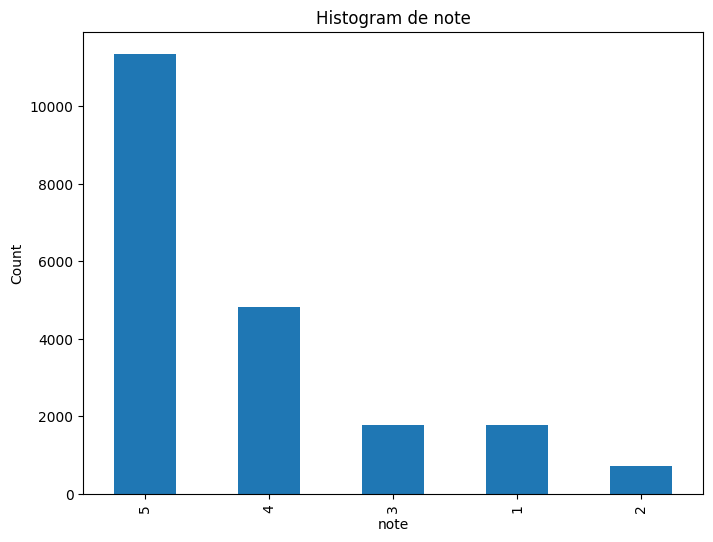

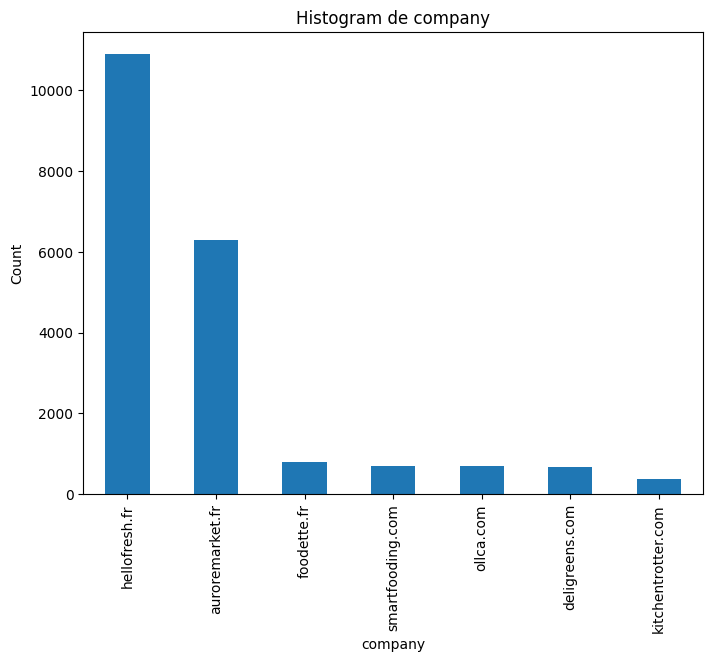

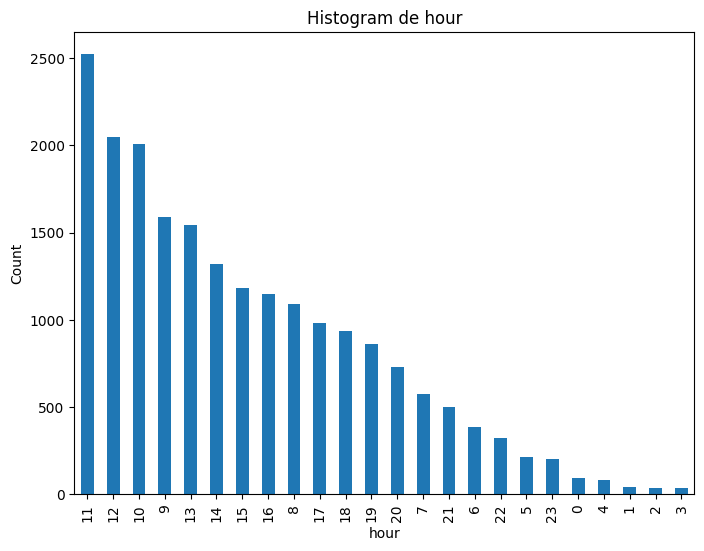

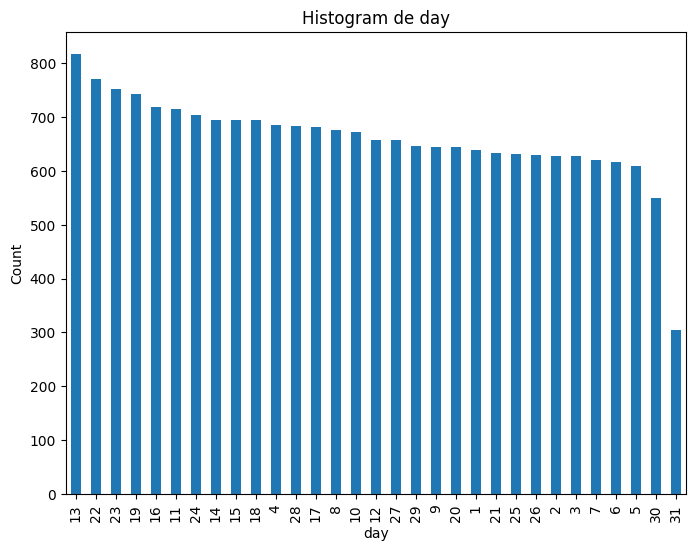

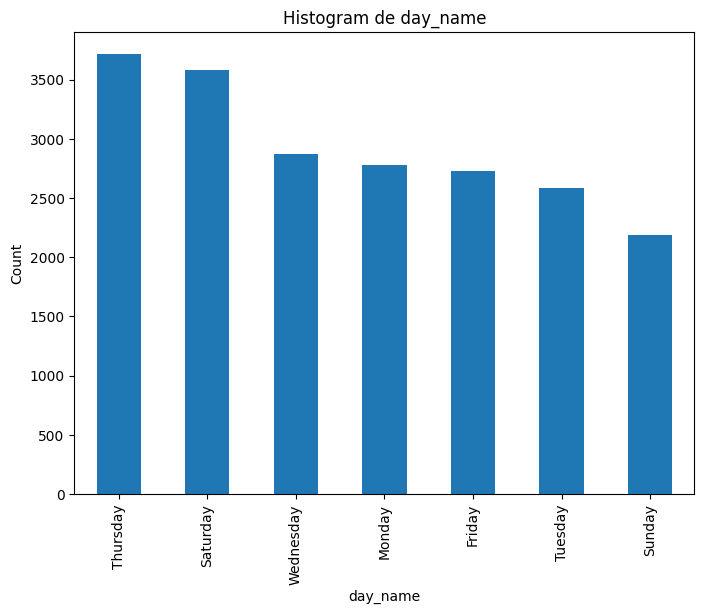

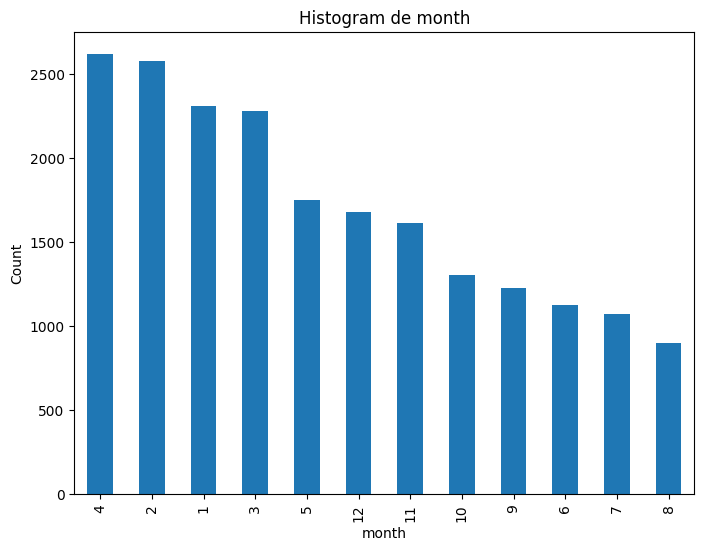

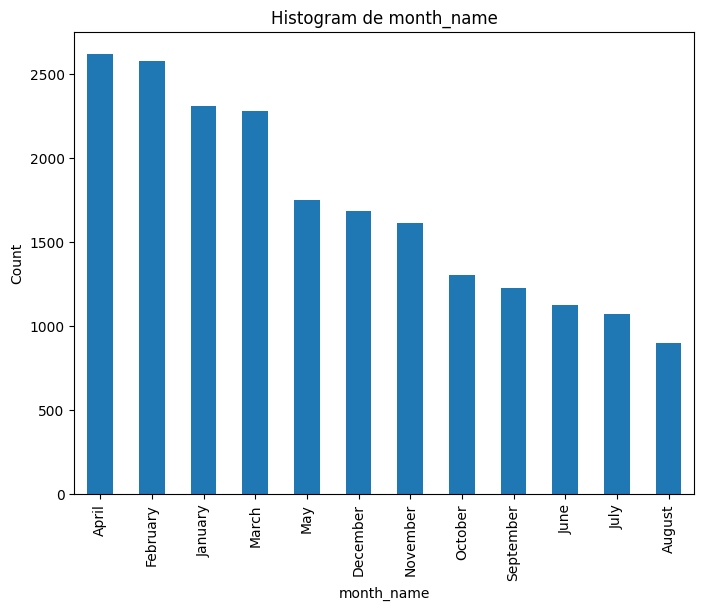

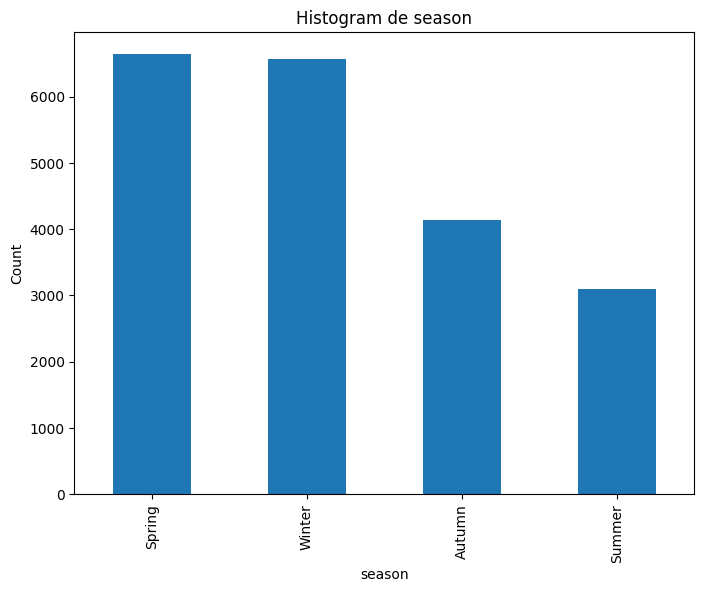

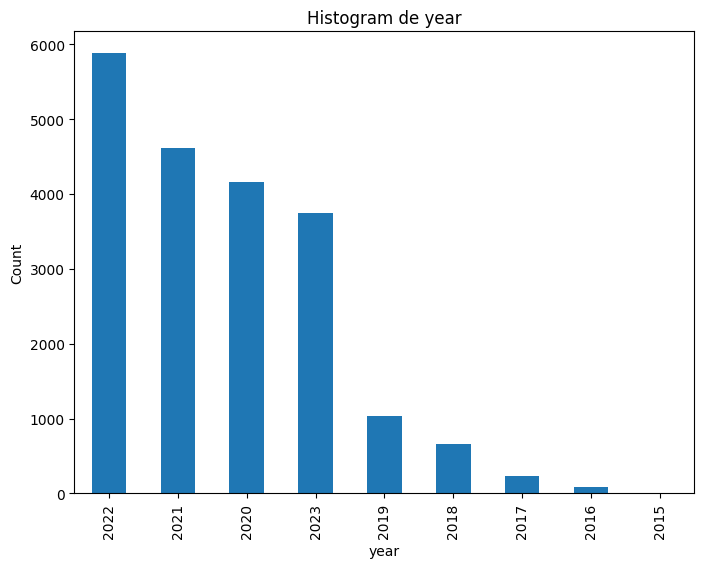

In [13]:
# List des features pour histograms
features = ['note' , 'company', 'hour', 'day', 'day_name', 'month', 'month_name', 'season', 'year']

# histograms
for feature in features:
    plt.figure(figsize=(8, 6))
    df[feature].value_counts().plot(kind='bar')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title('Histogram de {}'.format(feature))
    plt.show()

Notes

<Figure size 800x600 with 0 Axes>

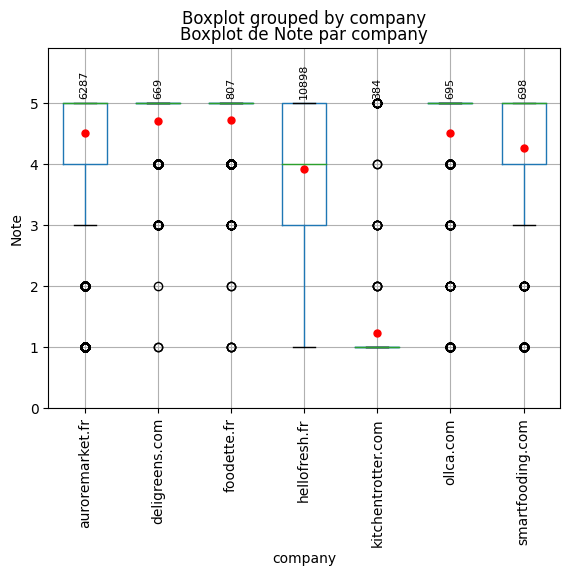

<Figure size 800x600 with 0 Axes>

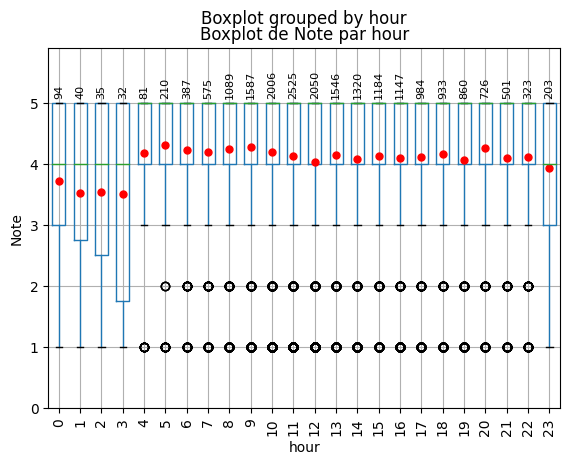

<Figure size 800x600 with 0 Axes>

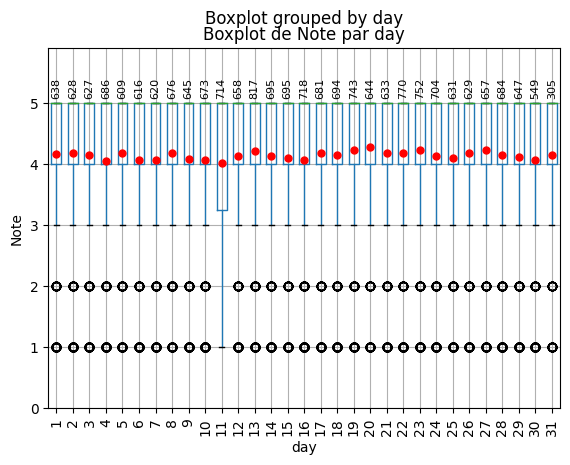

<Figure size 800x600 with 0 Axes>

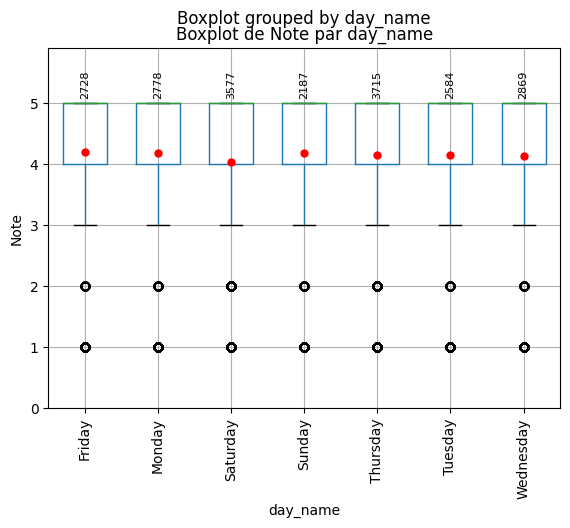

<Figure size 800x600 with 0 Axes>

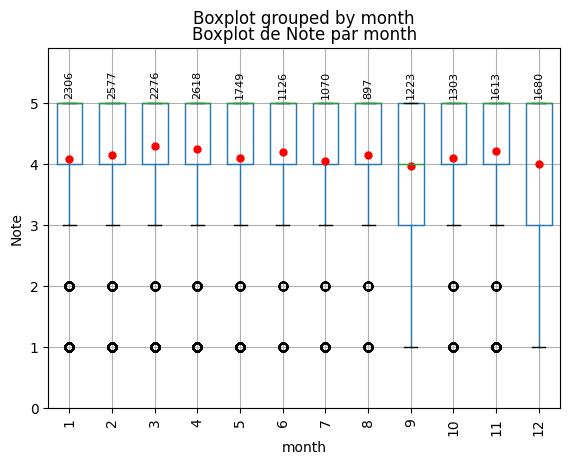

<Figure size 800x600 with 0 Axes>

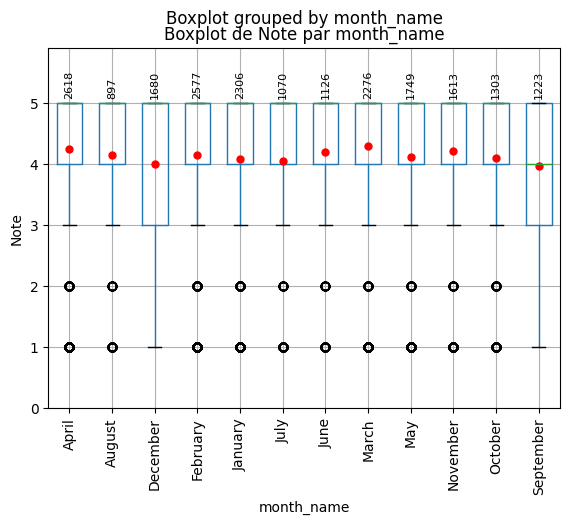

<Figure size 800x600 with 0 Axes>

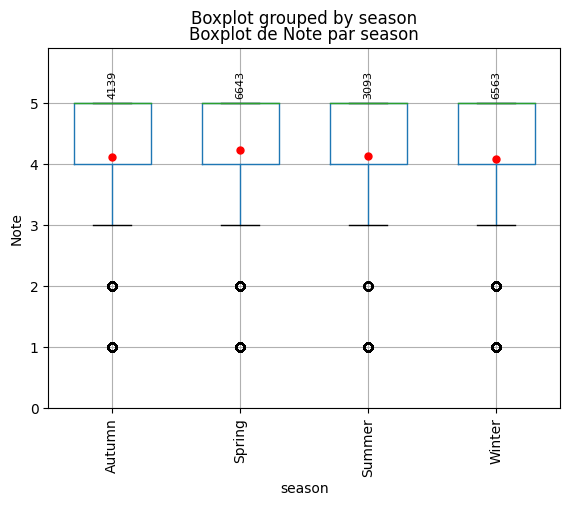

<Figure size 800x600 with 0 Axes>

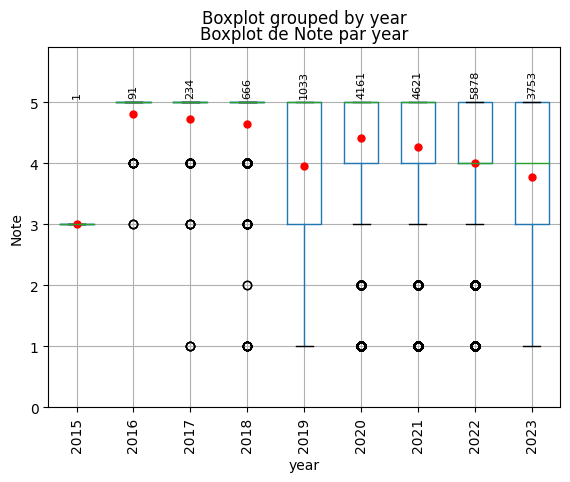

In [14]:
# Features pour boxplots
features = ['company', 'hour', 'day', 'day_name', 'month', 'month_name', 'season', 'year']

# Boxplots
for feature in features:
    plt.figure(figsize=(8, 6))
    ax = df.boxplot(column='note', by=feature, widths=0.6)
    ax.set_xlabel(feature)
    ax.set_ylabel('Note')
    ax.set_title('Boxplot de Note par {}'.format(feature))
    
    # Ajout du nombre d'observations
    counts = df.groupby(feature)['note'].count().values
    positions = range(1, len(counts) + 1)
    for pos, count in zip(positions, counts):
        ax.annotate(str(count), xy=(pos, df['note'].max()), xytext=(0, 3),
                    textcoords='offset points', ha='center', va='bottom', rotation='vertical', fontsize=8)
    
    # Mean point pour les modalités
    means = df.groupby(feature)['note'].mean()
    x_values = [pos for pos in positions]
    y_values = means.values
    ax.plot(x_values, y_values, marker='o', linestyle='', markersize=5, color='red')
    
    plt.xticks(rotation='vertical')
    plt.ylim(0, 5.9)  # Set y-axis range
    plt.show()

# NLP & Sentiment Analysis

Process the text

In [15]:
# import libraries

import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [16]:
# Stopwords update
nltk.download('stopwords')

# Fonction pour preprocesser le text
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Lowercase
    text = text.lower()
    
    # Retirer les nombres
    text = re.sub(r'\d+', '', text)
    
    # Tokenize text
    tokens = word_tokenize(text, language='french')
    
    # Retirer les stopwords
    stop_words = set(stopwords.words('french'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    
    # Tokens sous format 'single string'
    preprocessed_text = ' '.join(filtered_tokens)
    
    return preprocessed_text

# Preprocesse 'title'
df['title_preprocessed'] = df['title'].apply(preprocess_text)

# Preprocesse 'comment'
df['comment_preprocessed'] = df['comment'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ceren.inan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:

df[['title', 'title_preprocessed', 'comment', 'comment_preprocessed']].head()

,title,title_preprocessed,comment,comment_preprocessed
0,Des produits manquants pour une…,produits manquants une…,"Des produits manquants pour une recette, conta...",produits manquants recette contact chat indemn...
1,Facile et pratique,facile pratique,Les box hellofresh nous facilitent le quotidie...,box hellofresh facilitent quotidien plus pense...
2,Super idée recettes délicieuses.,super idée recettes délicieuses,Super idée recettes délicieuses. Tous les ingr...,super idée recettes délicieuses tous ingrédien...
3,Service de livraison incompétent !,service livraison incompétent,"Jusqu’à présent satisfait de la marque, mais u...",jusqu ’ présent satisfait marque service livra...
4,Expérience d'achat inacceptable,expérience dachat inacceptable,Expérience d'achat inacceptable. Une chaîne du...,expérience dachat inacceptable chaîne froid no...


In [18]:
df['full_text'] = df['title_preprocessed'] + ' ' + df['comment_preprocessed']

In [19]:

# Comparer texte brut et text processé
for index in selected_indexes:
    note = df.loc[index, 'note']
    title = df.loc[index, 'title']
    comment = df.loc[index, 'comment']
    processed_title = df.loc[index, 'title_preprocessed']
    processed_comment = df.loc[index, 'comment_preprocessed']
    
    print("Note", note, "comments:")
    print("Unprocessed Title:", title, "\n")
    print("Processed Title:", processed_title, "\n", "\n")
    
    wrapped_comment = textwrap.fill(comment, width=80)
    print("Unprocessed Comment:")
    print(wrapped_comment, "\n")
    
    wrapped_pcomment = textwrap.fill(processed_comment, width=80)
    print("Processed Comment:")
    print(wrapped_pcomment, "\n")

    print()

Note 1 comments:
Unprocessed Title: Bonjour Insatisfaite 

Processed Title: bonjour insatisfaite 
 

Unprocessed Comment:
BonjourTrès satisfaite de vos services, mais aujourd'hui insatisfaite du
livreur. Agée, j'ai des difficultés pour me déplacer, réside dans une résidence
au 3eme étage, le livreur n'a pas voulu monter ma livraison. Si cela se
reproduit je me verrai dans l'obligation de ne plus commander Cordialement 

Processed Comment:
bonjourtrès satisfaite services aujourdhui insatisfaite livreur agée jai
difficultés déplacer réside résidence eme étage livreur na voulu monter
livraison si cela reproduit verrai lobligation plus commander cordialement 


Note 2 comments:
Unprocessed Title: Suite à un problème technique je n'ai pas reçu les menus complets 

Processed Title: suite problème technique nai reçu menus complets 
 

Unprocessed Comment:
Suite à un problème technique je n'ai pas eu la viande de boeuf ni le poulet.
donc 2 menus sur 3 que je ne peux pas réaliser. J'aurai aimé 

Wordclouds

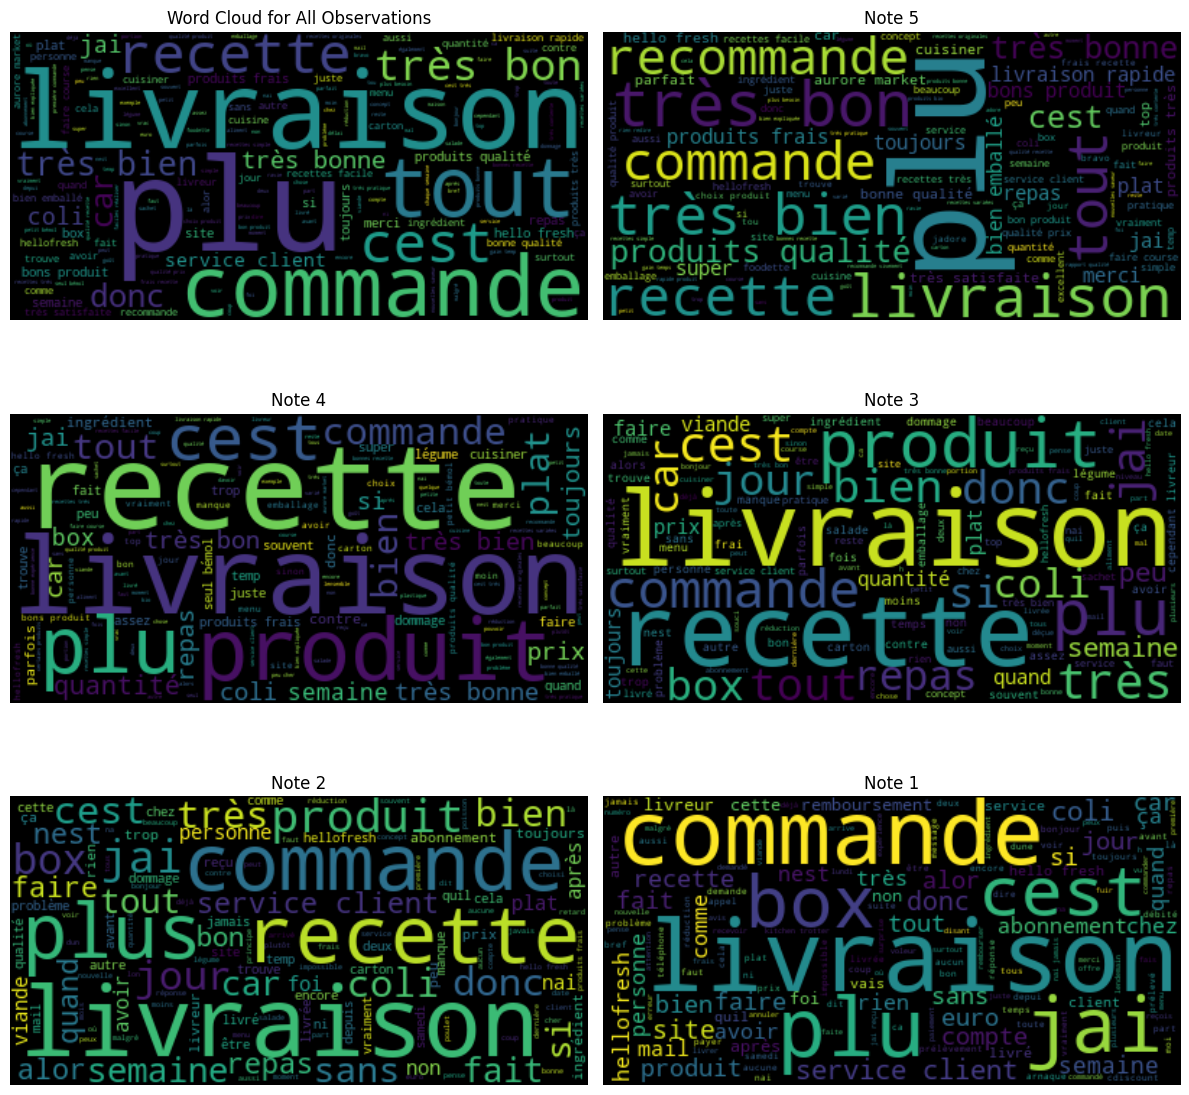

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate tout 'comment' text
all_comments = ' '.join(df['comment_preprocessed'])

# Word cloud pour l'ensemble
wordcloud_all = WordCloud().generate(all_comments)

# Subplots pour les notes
fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()

# Afficher word cloud pour toutes les observations
axes[0].imshow(wordcloud_all, interpolation='bilinear')
axes[0].set_title('Word Cloud for All Observations')
axes[0].axis('off')

# Pour chaque note
for i, note in enumerate(range(5, 0, -1)):
    comments = ' '.join(df[df['note'] == note]['comment_preprocessed'])
    wordcloud_note = WordCloud().generate(comments)
    axes[i+1].imshow(wordcloud_note, interpolation='bilinear')
    axes[i+1].set_title('Note {}'.format(note))
    axes[i+1].axis('off')

# Pour cacher les extras word clouds, si besoin
if len(axes) > 6:
    for j in range(6, len(axes)):
        axes[j].axis('off')

plt.tight_layout() 
plt.show()

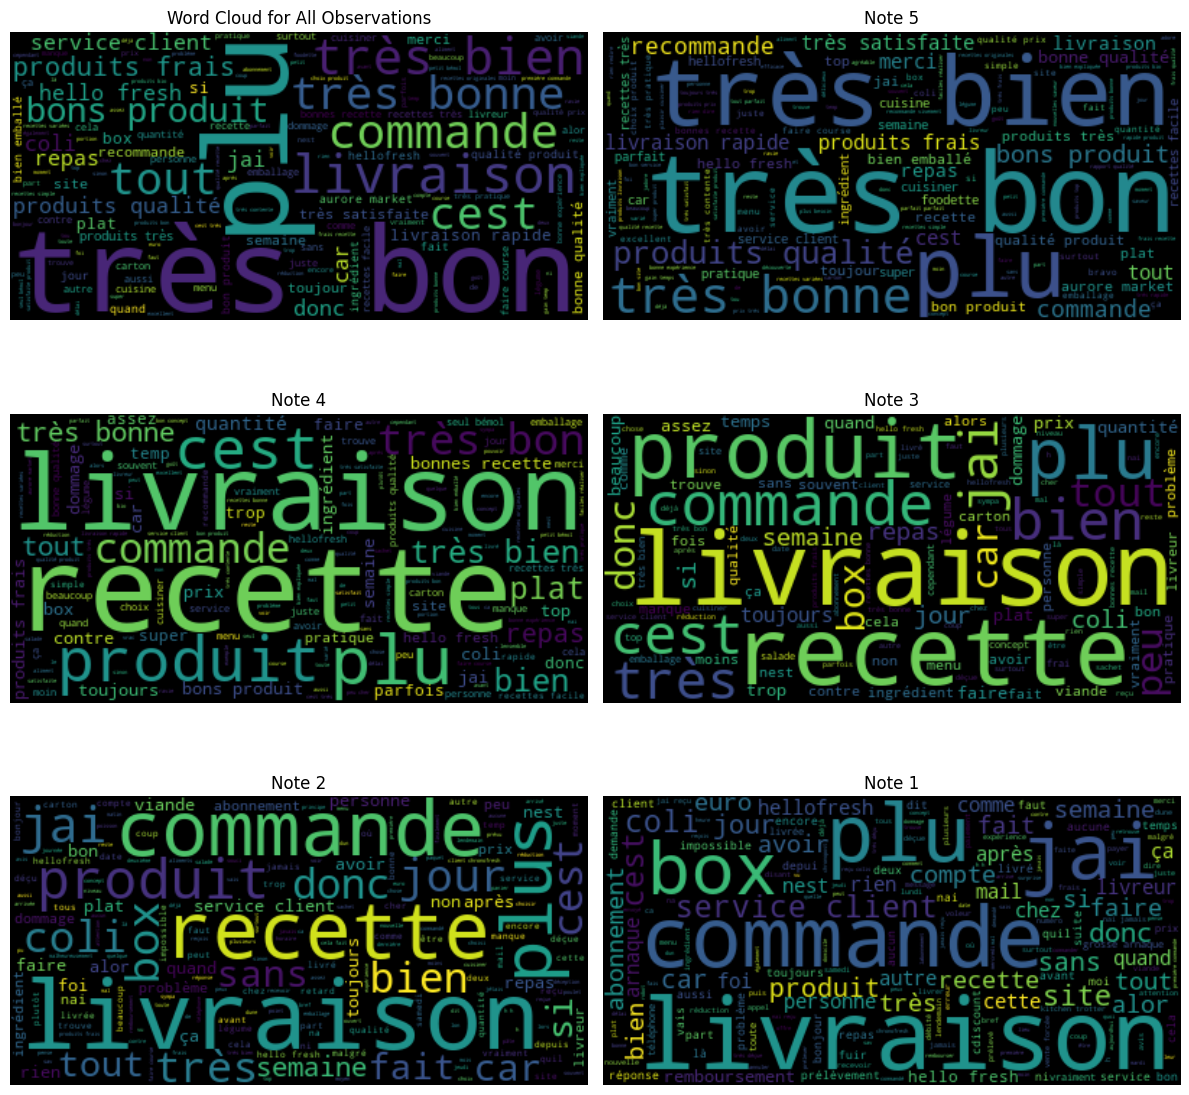

In [21]:
# idem pour full text 

all_comments = ' '.join(df['full_text'])

wordcloud_all = WordCloud().generate(all_comments)

fig, axes = plt.subplots(3, 2, figsize=(12, 12))
axes = axes.flatten()

axes[0].imshow(wordcloud_all, interpolation='bilinear')
axes[0].set_title('Word Cloud for All Observations')
axes[0].axis('off')

for i, note in enumerate(range(5, 0, -1)):
    comments = ' '.join(df[df['note'] == note]['full_text'])
    wordcloud_note = WordCloud().generate(comments)
    axes[i+1].imshow(wordcloud_note, interpolation='bilinear')
    axes[i+1].set_title('Note {}'.format(note))
    axes[i+1].axis('off')

if len(axes) > 6:
    for j in range(6, len(axes)):
        axes[j].axis('off')

plt.tight_layout() 
plt.show()

N_grams

In [73]:
from collections import Counter
from nltk import ngrams

# Concatenate tous 'comment' text
all_comments = ' '.join(df['comment_preprocessed'])

# N-gram value
n = 3  # 2-grams, tu mets 2, 3-grams tu mets 3, etc.

# Word frequency all data
all_comments_tokens = all_comments.split()
ngrams_all = list(ngrams(all_comments_tokens, n))
word_frequency_all = Counter(ngrams_all)

# Sort N-grams
sorted_word_frequency_all = sorted(word_frequency_all.items(), key=lambda x: x[1], reverse=True)

# Freq pour chaque note (5 to 1)
for note in range(5, 0, -1):
    comments = ' '.join(df[df['note'] == note]['comment_preprocessed'])
    comments_tokens = comments.split()
    ngrams_note = list(ngrams(comments_tokens, n))
    word_frequency_note = Counter(ngrams_note)

    # Sort N-grams par freq pour chaque note
    sorted_word_frequency_note = sorted(word_frequency_note.items(), key=lambda x: x[1], reverse=True)

    # Save format text file
    with open(f"word_frequency_note_{note}.txt", "w", encoding='utf-8') as file:
        for word, freq in sorted_word_frequency_note:
            file.write(f"{word}: {freq}\n")

# Save format text file
with open("word_frequency_all.txt", "w", encoding='utf-8') as file:
    for word, freq in sorted_word_frequency_all:
        file.write(f"{word}: {freq}\n")


In [19]:
# Idem pour full text
all_comments = ' '.join(df['full_text'])

n = 2  

all_comments_tokens = all_comments.split()
ngrams_all = list(ngrams(all_comments_tokens, n))
word_frequency_all = Counter(ngrams_all)

sorted_word_frequency_all = sorted(word_frequency_all.items(), key=lambda x: x[1], reverse=True)


for note in range(5, 0, -1):
    comments = ' '.join(df[df['note'] == note]['full_text'])
    comments_tokens = comments.split()
    ngrams_note = list(ngrams(comments_tokens, n))
    word_frequency_note = Counter(ngrams_note)

    sorted_word_frequency_note = sorted(word_frequency_note.items(), key=lambda x: x[1], reverse=True)

    with open(f"word_frequency_note_{note}.txt", "w", encoding='utf-8') as file:
        for word, freq in sorted_word_frequency_note:
            file.write(f"{word}: {freq}\n")


with open("word_frequency_all.txt", "w", encoding='utf-8') as file:
    for word, freq in sorted_word_frequency_all:
        file.write(f"{word}: {freq}\n")

Word2Vec and toy deep learning model (LSTM-based recurrent neural network)

In [22]:
df[['note', 'full_text']].head()

,note,full_text
0,3,produits manquants une… produits manquants rec...
1,5,facile pratique box hellofresh facilitent quot...
2,4,super idée recettes délicieuses super idée rec...
3,1,service livraison incompétent jusqu ’ présent ...
4,1,expérience dachat inacceptable expérience dach...


In [23]:
df[['note', 'full_text']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20438 entries, 0 to 20437
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   note       20438 non-null  int64 
 1   full_text  20438 non-null  object
dtypes: int64(1), object(1)
memory usage: 319.5+ KB


In [5]:
# import libraries

import numpy as np
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [26]:
# Split train, validation & test sets
df_text = df[['note', 'full_text']]
train_df, temp_df = train_test_split(df_text, test_size=0.3, random_state=42) # reserve 30% for test+validation
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42) # split the 30% into 15% test and 15% validation

# Preprocess (tokenization, padding, etc.)
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_df['full_text'])
train_sequences = tokenizer.texts_to_sequences(train_df['full_text'])
val_sequences = tokenizer.texts_to_sequences(val_df['full_text'])
test_sequences = tokenizer.texts_to_sequences(test_df['full_text'])
vocab_size = len(tokenizer.word_index) + 1

max_len = 100  # Maximum sequence len
train_data = pad_sequences(train_sequences, maxlen=max_len)
val_data = pad_sequences(val_sequences, maxlen=max_len)
test_data = pad_sequences(test_sequences, maxlen=max_len)

num_classes = 5  

train_labels = to_categorical(train_df['note'] - 1, num_classes=num_classes)  
val_labels = to_categorical(val_df['note'] - 1, num_classes=num_classes)
test_labels = to_categorical(test_df['note'] - 1, num_classes=num_classes)

word2vec_model = Word2Vec(sentences=train_sequences, vector_size=100, window=5, min_count=1, workers=4)

embedding_matrix = np.zeros((vocab_size, 100))
for word, i in tokenizer.word_index.items():
    if word in word2vec_model.wv:
        embedding_matrix[i] = word2vec_model.wv[word]




In [27]:
# Sequential LSTM model
model = Sequential()
model.add(Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=max_len, trainable=False))
model.add(LSTM(128))
model.add(Dense(num_classes, activation='softmax'))  


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

# Train 
model.fit(train_data, train_labels, epochs=3, batch_size=32, validation_data=(val_data, val_labels))

# Evaluate 
loss, accuracy = model.evaluate(test_data, test_labels)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/3
448/448 [==============================] - 20s 43ms/step - loss: 1.2262 - accuracy: 0.5545 - val_loss: 1.1989 - val_accuracy: 0.5620
Epoch 2/3
448/448 [==============================] - 18s 40ms/step - loss: 1.2140 - accuracy: 0.5554 - val_loss: 1.1960 - val_accuracy: 0.5620
Epoch 3/3
96/96 [==============================] - 1s 15ms/step - loss: 1.2107 - accuracy: 0.5496
Test Loss: 1.2107
Test Accuracy: 0.5496


In [28]:
model1 = Sequential()
model1.add(Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=max_len, trainable=False))
model1.add(LSTM(64, return_sequences=True))
model1.add(LSTM(64))
model1.add(Dense(num_classes, activation='softmax'))  

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model1.summary()

model1.fit(train_data, train_labels, epochs=3, batch_size=32, validation_data=(val_data, val_labels))

loss, accuracy = model1.evaluate(test_data, test_labels)
print(f"Model 1 - Test Loss: {loss:.4f}")
print(f"Model 1 - Test Accuracy: {accuracy:.4f}")


Epoch 1/3
448/448 [==============================] - 25s 50ms/step - loss: 1.2225 - accuracy: 0.5545 - val_loss: 1.1989 - val_accuracy: 0.5620
Epoch 2/3
448/448 [==============================] - 21s 46ms/step - loss: 1.2135 - accuracy: 0.5554 - val_loss: 1.2038 - val_accuracy: 0.5620
Epoch 3/3
96/96 [==============================] - 1s 15ms/step - loss: 1.2126 - accuracy: 0.5496
Model 1 - Test Loss: 1.2126
Model 1 - Test Accuracy: 0.5496


In [29]:
from tensorflow.keras.layers import GRU

model2 = Sequential()
model2.add(Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=max_len, trainable=False))
model2.add(GRU(128))
model2.add(Dense(num_classes, activation='softmax'))

model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model2.summary()

model2.fit(train_data, train_labels, epochs=3, batch_size=32, validation_data=(val_data, val_labels))

loss, accuracy = model2.evaluate(test_data, test_labels)
print(f"Model 2 - Test Loss: {loss:.4f}")
print(f"Model 2 - Test Accuracy: {accuracy:.4f}")


Epoch 1/3
448/448 [==============================] - 17s 36ms/step - loss: 1.2287 - accuracy: 0.5541 - val_loss: 1.2028 - val_accuracy: 0.5620
Epoch 2/3
448/448 [==============================] - 15s 34ms/step - loss: 1.2152 - accuracy: 0.5554 - val_loss: 1.2031 - val_accuracy: 0.5620
Epoch 3/3
96/96 [==============================] - 1s 11ms/step - loss: 1.2100 - accuracy: 0.5496
Model 2 - Test Loss: 1.2100
Model 2 - Test Accuracy: 0.5496


In [30]:
from tensorflow.keras.layers import Bidirectional

model3 = Sequential()
model3.add(Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=max_len, trainable=False))
model3.add(Bidirectional(LSTM(64)))
model3.add(Dense(num_classes, activation='softmax'))

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model3.summary()

model3.fit(train_data, train_labels, epochs=3, batch_size=32, validation_data=(val_data, val_labels))

loss, accuracy = model3.evaluate(test_data, test_labels)
print(f"Model 3 - Test Loss: {loss:.4f}")
print(f"Model 3 - Test Accuracy: {accuracy:.4f}")


Epoch 1/3
448/448 [==============================] - 16s 30ms/step - loss: 1.2255 - accuracy: 0.5547 - val_loss: 1.1960 - val_accuracy: 0.5620
Epoch 2/3
448/448 [==============================] - 13s 29ms/step - loss: 1.2141 - accuracy: 0.5554 - val_loss: 1.1985 - val_accuracy: 0.5620
Epoch 3/3
96/96 [==============================] - 1s 11ms/step - loss: 1.2123 - accuracy: 0.5496
Model 3 - Test Loss: 1.2123
Model 3 - Test Accuracy: 0.5496


In [31]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D

model4 = Sequential()
model4.add(Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=max_len, trainable=False))
model4.add(Conv1D(128, 5, activation='relu'))
model4.add(MaxPooling1D(5))
model4.add(LSTM(64))
model4.add(Dense(num_classes, activation='softmax'))

model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model4.summary()

model4.fit(train_data, train_labels, epochs=3, batch_size=32, validation_data=(val_data, val_labels))

loss, accuracy = model4.evaluate(test_data, test_labels)
print(f"Model 4 - Test Loss: {loss:.4f}")
print(f"Model 4 - Test Accuracy: {accuracy:.4f}")


Epoch 1/3
448/448 [==============================] - 7s 13ms/step - loss: 1.2302 - accuracy: 0.5543 - val_loss: 1.1991 - val_accuracy: 0.5620
Epoch 2/3
448/448 [==============================] - 5s 12ms/step - loss: 1.2148 - accuracy: 0.5554 - val_loss: 1.1976 - val_accuracy: 0.5620
Epoch 3/3
96/96 [==============================] - 0s 5ms/step - loss: 1.2099 - accuracy: 0.5496
Model 4 - Test Loss: 1.2099
Model 4 - Test Accuracy: 0.5496


# BERT

In [13]:
# import libraries

import pandas as pd

from sklearn.model_selection import train_test_split

from tqdm import tqdm

In [4]:
df = pd.read_parquet("reviews_takeaway.parquet")

In [15]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import Dataset, DataLoader

# BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Convert data à InputExample format
class InputExample(object):
    def __init__(self, guid, text_a, text_b, label):
        self.guid = guid
        self.text_a = text_a
        self.text_b = text_b
        self.label = label

def convert_data_to_examples(df, input_column, target_column):
    examples = []
    for i, row in df.iterrows():
        guid = None
        text_a = row[input_column]
        text_b = None
        label = row[target_column]
        examples.append(InputExample(guid=guid, text_a=text_a, text_b=text_b, label=label))
    return examples

class CustomDataset(Dataset):
    def __init__(self, examples, tokenizer, max_length):
        self.examples = examples
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.examples)

    def __getitem__(self, index):
        example = self.examples[index]
        inputs = self.tokenizer.encode_plus(
            example.text_a,
            example.text_b,
            add_special_tokens=True,
            max_length=self.max_length,
            padding="max_length",
            truncation=True
        )
        input_ids = torch.tensor(inputs["input_ids"])
        attention_mask = torch.tensor(inputs["attention_mask"])
        token_type_ids = torch.tensor(inputs["token_type_ids"])
        label = torch.tensor(example.label)

        return {
            "input_ids": input_ids,
            "attention_mask": attention_mask,
            "token_type_ids": token_type_ids,
            "label": label
        }

# Split
df['full_raw'] = 'TITRE: ' + df['title'] + ' |AND| ' + 'COMMENT: ' + df['comment']
df_text = df[['note', 'full_raw']].copy()
df_text['note'] = df_text['note'] - 1

train_df, val_df = train_test_split(df_text, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(val_df, test_size=0.5, random_state=42)

# Convert à InputExample format
train_examples = convert_data_to_examples(train_df, 'full_raw', 'note')
val_examples = convert_data_to_examples(val_df, 'full_raw', 'note')
test_examples = convert_data_to_examples(test_df, 'full_raw', 'note')

# Convert à PyTorch dataset format
train_dataset = CustomDataset(train_examples, tokenizer, max_length=128)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

val_dataset = CustomDataset(val_examples, tokenizer, max_length=128)
val_dataloader = DataLoader(val_dataset, batch_size=32)

# Load pre-trained BERT model
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=5)

# Freeze BERT layers
for param in model.parameters():
    param.requires_grad = True

# Define optimizer, loss function, and metric
optimizer = torch.optim.AdamW(model.parameters(), lr=3e-5, eps=1e-8)
loss_fn = torch.nn.CrossEntropyLoss()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Train
num_epochs = 3 #à 10 epochs, ça overfit dès le 4e epoch
#for epoch in range(num_epochs): #si sans tqdm
for epoch in tqdm(range(num_epochs), desc="Training"):
    model.train()
    total_loss = 0
    total_correct = 0
    total_samples = 0
    
    for batch in train_dataloader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        token_type_ids = batch["token_type_ids"].to(device)
        labels = batch["label"].to(device)
        
        optimizer.zero_grad()
        
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids, labels=labels)
        
        loss = outputs.loss
        logits = outputs.logits
        
        _, predicted = torch.max(logits, dim=1)
        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)
        
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    
    train_loss = total_loss / len(train_dataloader)
    train_accuracy = total_correct / total_samples
    
    model.eval()
    val_loss = 0
    val_correct = 0
    val_samples = 0
    
    with torch.no_grad():
        for batch in val_dataloader:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            token_type_ids = batch["token_type_ids"].to(device)
            labels = batch["label"].to(device)
            
            outputs = model(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids, labels=labels)
            
            loss = outputs.loss
            logits = outputs.logits
            
            _, predicted = torch.max(logits, dim=1)
            val_correct += (predicted == labels).sum().item()
            val_samples += labels.size(0)
            
            val_loss += loss.item()
    
    val_loss /= len(val_dataloader)
    val_accuracy = val_correct / val_samples
    
    print(f"Epoch {epoch+1}/{num_epochs}:")
    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")
    print(f"Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}")
    print()
    

test_dataset = CustomDataset(test_examples, tokenizer, max_length=128)
test_dataloader = DataLoader(test_dataset, batch_size=32)

# Evaluate
model.eval()
test_loss = 0
test_correct = 0
test_samples = 0

with torch.no_grad():
    for batch in test_dataloader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        token_type_ids = batch["token_type_ids"].to(device)
        labels = batch["label"].to(device)
        
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids, labels=labels)
        
        loss = outputs.loss
        logits = outputs.logits
        
        _, predicted = torch.max(logits, dim=1)
        test_correct += (predicted == labels).sum().item()
        test_samples += labels.size(0)
        
        test_loss += loss.item()

test_loss /= len(test_dataloader)
test_accuracy = test_correct / test_samples

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")




Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly i

Epoch 1/3:
Train Loss: 0.8855, Train Accuracy: 0.6477
Val Loss: 0.7420, Val Accuracy: 0.7040



Training:  67%|██████▋   | 2/3 [02:59<01:30, 90.13s/it]

Epoch 2/3:
Train Loss: 0.6863, Train Accuracy: 0.7280
Val Loss: 0.7128, Val Accuracy: 0.7123



Training: 100%|██████████| 3/3 [04:30<00:00, 90.32s/it]

Epoch 3/3:
Train Loss: 0.6013, Train Accuracy: 0.7607
Val Loss: 0.7520, Val Accuracy: 0.7138



Test Loss: 0.7491
Test Accuracy: 0.7035


In [5]:
# import libraries

import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from transformers import InputExample, InputFeatures

In [6]:
# BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased", do_lower_case=True)

# Convert InputExample format
def convert_data_to_examples(df, INPUT_COLUMN, TARGET_COLUMN):
    InputExamples = df.apply(lambda x: InputExample(guid=None, 
                                                    text_a = x[INPUT_COLUMN], 
                                                    text_b = None,
                                                    label = x[TARGET_COLUMN]), axis = 1)
    return InputExamples

def convert_examples_to_tf_dataset(examples, tokenizer, max_length=128):
    features = [] 
    for e in examples:
        input_dict = tokenizer.encode_plus(
            e.text_a,
            add_special_tokens=True,
            max_length=max_length,
            return_token_type_ids=True,
            return_attention_mask=True,
            pad_to_max_length=True,
            truncation=True
        )
        input_ids, token_type_ids, attention_mask = (input_dict["input_ids"],
            input_dict["token_type_ids"], input_dict['attention_mask'])
        features.append(
            InputFeatures(
                input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids, label=e.label
            )
        )

    def gen():
        for f in features:
            yield (
                {
                    "input_ids": f.input_ids,
                    "attention_mask": f.attention_mask,
                    "token_type_ids": f.token_type_ids,
                },
                f.label,
            )

    return tf.data.Dataset.from_generator(
        gen,
        ({"input_ids": tf.int32, "attention_mask": tf.int32, "token_type_ids": tf.int32}, tf.int64),
        (
            {
                "input_ids": tf.TensorShape([None]),
                "attention_mask": tf.TensorShape([None]),
                "token_type_ids": tf.TensorShape([None]),
            },
            tf.TensorShape([]),
        ),
    )

# Split
df['full_raw'] = 'TITRE: ' + df['title'] + ' |AND| ' + 'COMMENT: ' + df['comment']
df_text = df[['note', 'full_raw']].copy()  # Using .copy() to avoid the SettingWithCopyWarning
df_text['note'] = df_text['note'] - 1

train_df, val_df = train_test_split(df_text, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(val_df, test_size=0.5, random_state=42)

# Convert InputExample format
train_InputExamples = convert_data_to_examples(train_df, 'full_raw', 'note')
val_InputExamples = convert_data_to_examples(val_df, 'full_raw', 'note')
test_InputExamples = convert_data_to_examples(test_df, 'full_raw', 'note')

# Convert à tensorflow dataset format
train_data = convert_examples_to_tf_dataset(list(train_InputExamples), tokenizer)
train_data = train_data.shuffle(100).batch(32).repeat(2)

val_data = convert_examples_to_tf_dataset(list(val_InputExamples), tokenizer)
val_data = val_data.batch(32)



/home/prajna/miniconda3/envs/tf/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:2377: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
2023-06-27 23:01:03.741092: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-27 23:01:03.741423: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No

In [8]:
# Load pre-trained BERT model
model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=5) 

# Freeze BERT layers
model.layers[0].trainable = False

# Define optimizer, loss function and metric
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

model.summary()

# Train
history = model.fit(train_data, epochs=2, validation_data=val_data)


test_data = convert_examples_to_tf_dataset(list(test_InputExamples), tokenizer)
test_data = test_data.batch(32)

# Evaluate
loss, accuracy = model.evaluate(test_data)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model: "tf_bert_for_sequence_classification_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bert (TFBertMainLayer)      multiple                  109482240 
                                                                 
 dropout_75 (Dropout)        multiple                  0         
                                                                 
 classifier (Dense)          multiple                  3845      
                                                                 
Total params: 109,486,085
Trainable params: 3,845
Non-trainable params: 109,482,240
_________________________________________________________________
Epoch 1/2
     84/Unknown - 461s 5s/step - loss: 1.2665 - accuracy: 0.5577

KeyboardInterrupt: 

In [9]:
# Load pre-trained BERT
model = TFBertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=5)


# Define optimizer, loss function and metric
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

model.summary()

# Train
history = model.fit(train_data, epochs=2, validation_data=val_data)


test_data = convert_examples_to_tf_dataset(list(test_InputExamples), tokenizer)
test_data = test_data.batch(32)

# Evaluate
loss, accuracy = model.evaluate(test_data)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Epoch 1/2


    296/Unknown - 3120s 10s/step - loss: 1.0218 - accuracy: 0.5917

# CamemBERT

In [3]:
# Import libraries
from sklearn.model_selection import train_test_split
from transformers import CamembertTokenizer, TFCamembertForSequenceClassification
from transformers import InputExample, InputFeatures
import tensorflow as tf


# CamemBERT tokenizer
tokenizer = CamembertTokenizer.from_pretrained("camembert-base")

# Convert InputExample format
def convert_data_to_examples(df, INPUT_COLUMN, TARGET_COLUMN):
    InputExamples = df.apply(lambda x: InputExample(guid=None, 
                                                    text_a = x[INPUT_COLUMN], 
                                                    text_b = None,
                                                    label = x[TARGET_COLUMN]), axis = 1)
    return InputExamples

def convert_examples_to_tf_dataset(examples, tokenizer, max_length=128):
    features = [] 
    for e in examples:
        input_dict = tokenizer.encode_plus(
            e.text_a,
            add_special_tokens=True,
            max_length=max_length,
            return_token_type_ids=True,
            return_attention_mask=True,
            pad_to_max_length=True,
            truncation=True
        )
        input_ids, token_type_ids, attention_mask = (input_dict["input_ids"],
            input_dict["token_type_ids"], input_dict['attention_mask'])
        features.append(
            InputFeatures(
                input_ids=input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids, label=e.label
            )
        )

    def gen():
        for f in features:
            yield (
                {
                    "input_ids": f.input_ids,
                    "attention_mask": f.attention_mask,
                    "token_type_ids": f.token_type_ids,
                },
                f.label,
            )

    return tf.data.Dataset.from_generator(
        gen,
        ({"input_ids": tf.int32, "attention_mask": tf.int32, "token_type_ids": tf.int32}, tf.int64),
        (
            {
                "input_ids": tf.TensorShape([None]),
                "attention_mask": tf.TensorShape([None]),
                "token_type_ids": tf.TensorShape([None]),
            },
            tf.TensorShape([]),
        ),
    )


# Split
df['full_raw'] = 'TITRE: ' + df['title'] + ' |AND| ' + 'COMMENT: ' + df['comment']
df_text = df[['note', 'full_raw']].copy()  # Using .copy() to avoid the SettingWithCopyWarning
df_text['note'] = df_text['note'] - 1

train_df, val_df = train_test_split(df_text, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(val_df, test_size=0.5, random_state=42)

# Convert InputExample format
train_InputExamples = convert_data_to_examples(train_df, 'full_raw', 'note')
val_InputExamples = convert_data_to_examples(val_df, 'full_raw', 'note')
test_InputExamples = convert_data_to_examples(test_df, 'full_raw', 'note')

# Convert tensorflow dataset format
train_data = convert_examples_to_tf_dataset(list(train_InputExamples), tokenizer)
train_data = train_data.shuffle(100).batch(32).repeat(2)

val_data = convert_examples_to_tf_dataset(list(val_InputExamples), tokenizer)
val_data = val_data.batch(32)

# Load pre-trained CamemBERT model
model = TFCamembertForSequenceClassification.from_pretrained("camembert-base", num_labels=5) 

# Freeze CamemBERT layers
model.layers[0].trainable = False

# Define optimizer, loss function and metric
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')

model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

model.summary()

# Train
history = model.fit(train_data, epochs=2, validation_data=val_data)


test_data = convert_examples_to_tf_dataset(list(test_InputExamples), tokenizer)
test_data = test_data.batch(32)

# Evaluate 
loss, accuracy = model.evaluate(test_data)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


2023-06-27 23:20:33.830363: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-27 23:20:33.947416: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/prajna/miniconda3/envs/tf/lib/
2023-06-27 23:20:33.947436: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-06-27 23:20:34.679203: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot 

/home/prajna/miniconda3/envs/tf/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:2377: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
2023-06-27 23:20:41.772184: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-06-27 23:20:41.772481: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No

All PyTorch model weights were used when initializing TFCamembertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFCamembertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model: "tf_camembert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 roberta (TFCamembertMainLay  multiple                 110031360 
 er)                                                             
                                                                 
 classifier (TFCamembertClas  multiple                 594437    
 sificationHead)                                                 
                                                                 
Total params: 110,625,797
Trainable params: 594,437
Non-trainable params: 110,031,360
_________________________________________________________________
Epoch 1/2
    505/Unknown - 2601s 5s/step - loss: 1.1845 - accuracy: 0.5562

KeyboardInterrupt: 